# <span style = "color: green" >Simple Linear Regression Project (Gold Price Prediction) </span>

***

Of all the precious metals, gold is the most popular as an investment. Investors generally buy gold as a way of diversifying risk, especially through the use of futures contracts and derivatives. The gold market is subject to speculation and volatility as are other markets. Compared to other precious metals used for investment, gold has been the most effective safe haven across a number of countries.<br><br>
The Dataset contain gold prices (in USD) from 2001 to 2019.
Our goal is to predict where the gold prices will be in the coming years

#### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read 'gold_price_usd.csv' & store it in a variable

In [2]:
df=pd.read_csv('gold_price_usd.csv')

#### View the first 5 rows

In [3]:
df.head()

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


#### Check the information

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4718 non-null   object 
 1   USD (AM)  4718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.8+ KB


#### Find the columns

In [67]:
df.columns

Index(['Date', 'USD (AM)'], dtype='object')

#### Rename USD (AM) to Price

In [4]:
df.rename(columns={'USD (AM)':'Price'},inplace=True)


In [5]:
df.head(2)

,Date,Price
0,2001-01-02,272.8
1,2001-01-03,269.0


#### Check if there are any missing values in the dataset

In [6]:
df.isna().sum()

Date     0
Price    0
dtype: int64

#### Gather the basic statistical information about the dataset

In [7]:
df.describe()

,Price
count,4718.000000
mean,959.990812
std,449.456217
min,256.700000
25%,449.112500
50%,1113.125000
75%,1293.750000
max,1896.500000


#### Convert Date column from object to datetime format

In [8]:
df['Date']=pd.to_datetime(df['Date'])
#df['Date']=pd.to_datetime(df['Date'].dt.),format='%Y%m%d',errors='ignore'

In [9]:
df['Date'].dtypes

dtype('<M8[ns]')

In [10]:
df.head(2)

,Date,Price
0,2001-01-02,272.8
1,2001-01-03,269.0


#### Create a new column with Year

In [11]:
df['Year'] = df['Date'].dt.year

In [12]:
df['Month']=df['Date'].dt.month

In [13]:
df.head()

,Date,Price,Year,Month
0,2001-01-02,272.80,2001,1
1,2001-01-03,269.00,2001,1
2,2001-01-04,268.75,2001,1
3,2001-01-05,268.00,2001,1
4,2001-01-08,268.60,2001,1


#### See all the years and Months in our dataset

In [14]:
#Years

In [15]:
df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [16]:
#Months

In [17]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

## <span style = "color: orange" >Visualization</span>

### Create a regression plot with x-axis as years and y-axis as Price

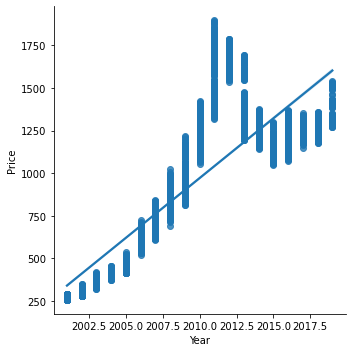

In [18]:
sns.lmplot(x='Year',y='Price',data=df, )
plt.show()


### Plot a histplot to find the variation in price

<AxesSubplot:xlabel='Price', ylabel='Count'>

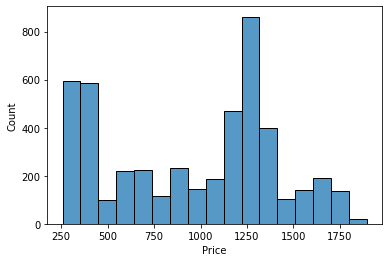

In [19]:
sns.histplot(x='Price',data=df)

### Assign year and price in x and y variables

In [20]:
X = df[['Year']]
y = df['Price']

### Split the data into traning and testin set

We will train our model on the training set and then use the test set to evaluate the model

In [24]:
# import train_test split
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=100)

## Train Data

In [26]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

### Create Linear Regression Model

In [27]:
reg=LinearRegression()

### Train the  model

In [28]:
reg.fit(X_train,y_train)

LinearRegression()

### Check the score of our model

In [29]:
reg.score(X_train,y_train)

0.7085513157822348

### Check the coefficient and Intercept

In [30]:
reg.intercept_

-139767.70206706654

In [31]:
#print the coefficent


In [32]:
reg.coef_

array([70.01948266])

In [33]:
X_test.reset_index(inplace = True, drop = True)

In [34]:
X_test

,Year
0,2004
1,2002
2,2013
3,2007
4,2009
...,...
939,2019
940,2019
941,2011
942,2006


### Make Prediction with Test data

In [35]:
# Also store the predicted values in a variable
y_pred=reg.predict(X_test)
# y_pred=pd.DataFrame(y_pred)
# y_pred['Prediction']=y_pred
#y_pred.drop(columns=['0'],axis=1)


In [36]:
y_pred

array([ 551.34119164,  411.30222631, 1181.51653562,  761.39963963,
        901.43860496,  411.30222631,  341.28274365,  691.38015697,
       1181.51653562, 1321.55550095,  691.38015697, 1601.6334316 ,
       1321.55550095, 1251.53601828,  831.4191223 ,  481.32170898,
        621.36067431,  551.34119164, 1461.59446627, 1461.59446627,
        761.39963963,  971.45808763, 1251.53601828, 1391.57498361,
       1181.51653562, 1251.53601828,  691.38015697, 1391.57498361,
        551.34119164,  621.36067431, 1601.6334316 , 1391.57498361,
       1041.47757029, 1531.61394894,  971.45808763, 1531.61394894,
       1251.53601828,  481.32170898, 1391.57498361, 1601.6334316 ,
        971.45808763, 1321.55550095, 1391.57498361,  971.45808763,
        691.38015697,  971.45808763, 1461.59446627,  761.39963963,
       1391.57498361, 1531.61394894, 1181.51653562, 1041.47757029,
       1461.59446627,  621.36067431, 1111.49705295,  621.36067431,
        831.4191223 ,  341.28274365, 1391.57498361,  971.45808

In [37]:
#y_pred.rename(columns={"0":"Prediction"})
#y_pred.drop(['0'],index=1,inplace=True)
#y_pred.head(2)

In [38]:
y_test.head(2)

962    425.5
403    307.8
Name: Price, dtype: float64

### Create a new dataframe with actual and predicted values with year(X_test) as index

In [39]:
X_test['Actual'] = y_test.values

In [40]:
X_test['Predicted']= y_pred

In [41]:

# nw_df=pd.concat([X_test,y_test,y_pred],axis=1)
# nw_df.head(2)
#nw_df.head()

In [42]:
X_test

,Year,Actual,Predicted
0,2004,425.50,551.341192
1,2002,307.80,411.302226
2,2013,1335.75,1181.516536
3,2007,687.25,761.399640
4,2009,924.75,901.438605
...,...,...,...
939,2019,1306.60,1601.633432
940,2019,1275.25,1601.633432
941,2011,1369.25,1041.477570
942,2006,541.00,691.380157


### Check the mean absolute error, mean square error

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
# Mean absolute error


In [45]:
mean_absolute_error(y_test,y_pred)

187.58323879063857

In [46]:
# Mean squared error


In [47]:
mean_squared_error(y_pred,y_test)

60025.98233022039

### Predict the prices for the following years
   * 2025, 2026, 2027, 2028, 2030

In [121]:
a = [2025, 2026, 2027, 2028, 2030]

In [125]:
a = pd.DataFrame(a, columns = ['Year'])

In [126]:
reg.predict(a)

array([2021.75032759, 2091.76981025, 2161.78929291, 2231.80877558,
       2371.84774091])

In [49]:
X_test.head(2)

,Year,Actual,Predicted
0,2004,425.5,551.341192
1,2002,307.8,411.302226


In [63]:
X_test[X_test['Predicted'] == 411.302226]['Year']

Series([], Name: Year, dtype: int64)

***

# <span style = "color:green;font-size:40px"> Great Job!</span>